# Building RNN with Pytorch

Dans ce TD, nous allons construire un RNN from scratch avec Pytorch, en suivant les étapes suivantes:
1. Sur un problème linéaire, nous allons utiliser les torch optimizers pour trouver le paramètre de régression idéal
2. Sur un problème non-linéaire, nous allons construire un multi-layers perceptron
3. Sur un problème de texte, nous allons construire un modèle RNN

In [96]:
import matplotlib.pyplot as plt
import numpy as np
import torch



## Optimizers

### Données example
Nous allons construire des données $y = \beta^* X + b$


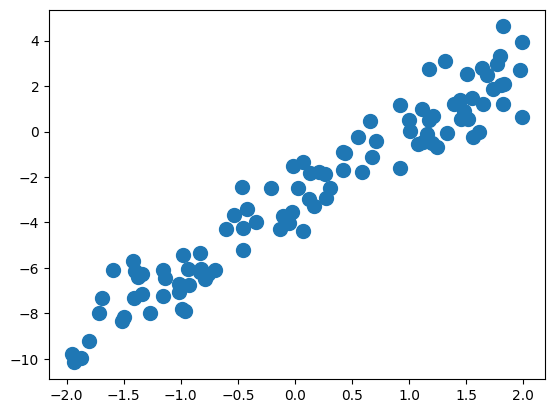

In [97]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

n = 100

a_star = 3.
b_star = -3.
noise_std = 1

x = (np.random.rand(n, 1) - 0.5) * 4
noise = np.random.normal(0, noise_std, (n, 1))
y = a_star * x + b_star + noise

x = torch.tensor(x, dtype=torch.float32)

xvec = x
plt.plot(x, y, 'o', markersize=10)

### Constuire l'optimizer

- Avec torch.nn.Parameter(), créer le paramètre beta qui sera optimisé. Les predictions du modèle sont égales à $\beta \times X$ 
- Avec torch.nn.MSELoss, déclarer la loss entre les prédictions et le résultat réel. loss.backward() pour mettre à jour les gradients
- Avec torch.optim.Adam, déclarer un optimizer
- Construisez la boucle qui, pour n_epochs, va reset les gradients, calculer la loss, mettre à jour les gradients et faire un pas pour optimiser beta

In [98]:
# Conversion des données en tenseurs PyTorch
x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Normalisation des données d'entrée
x_mean = x_tensor.mean()
x_std = x_tensor.std()
x_norm = (x_tensor - x_mean) / x_std

# Initialisation de beta près de la valeur réelle
beta = torch.nn.Parameter(torch.tensor([a_star], dtype=torch.float32), requires_grad=True)

# Fonction de perte avec réduction moyenne
loss_fn = torch.nn.MSELoss(reduction='mean')

# Définition de l'optimiseur avec un taux d'apprentissage ajusté
optimizer = torch.optim.Adam([beta], lr=0.01)

# Boucle d'entraînement
n_epochs = 1000
for epoch in range(n_epochs):
    # Prédictions du modèle
    y_pred = beta * x_norm

    # Calcul de la perte
    loss = loss_fn(y_pred, y_tensor)

    # Réinitialisation des gradients
    optimizer.zero_grad()

    # Rétropropagation
    loss.backward()

    # Mise à jour des paramètres
    optimizer.step()

    # Affichage de la perte tous les 100 époques
    if epoch % 100 == 0:
        print(f'Epoch {epoch}: loss = {loss.item()}')

# Conversion de beta en tableau numpy pour le tracé
beta_numpy = beta.detach().numpy()

# Conversion de x_tensor en tableau numpy pour le tracé
x_numpy = x_tensor.numpy()

# Calcul des prédictions pour le tracé
predictions_numpy = beta_numpy * x_numpy


C:\Users\louis\AppData\Local\Temp\ipykernel_15660\1813471404.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_tensor = torch.tensor(x, dtype=torch.float32)


Epoch 0: loss = 8.140254020690918
Epoch 100: loss = 7.777768135070801
Epoch 200: loss = 7.777609825134277
Epoch 300: loss = 7.777609348297119
Epoch 400: loss = 7.777609348297119
Epoch 500: loss = 7.777609348297119
Epoch 600: loss = 7.777609825134277
Epoch 700: loss = 7.777609825134277
Epoch 800: loss = 7.777609825134277
Epoch 900: loss = 7.777609825134277


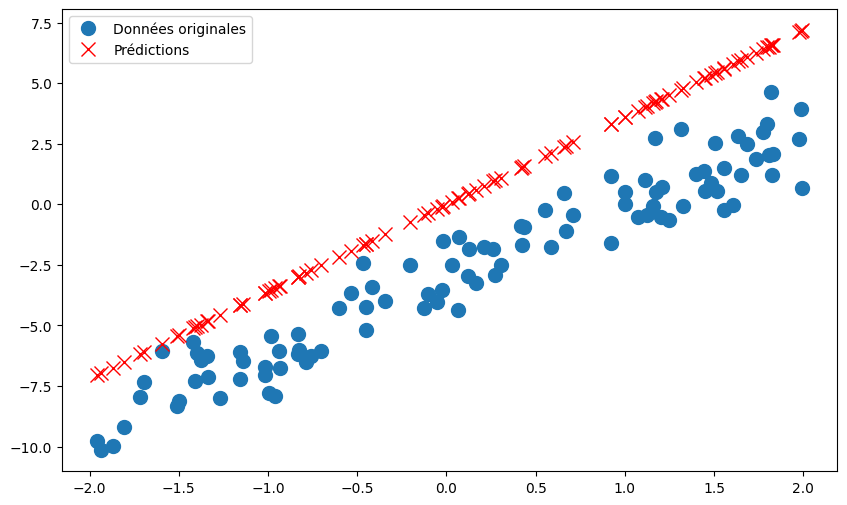

In [99]:
# Plot des predictions
#plt.plot(x, y, 'o', markersize=10)
#plt.plot(x, beta * x, 'rx')

# Tracé des données originales et des prédictions
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', markersize=10, label='Données originales')
plt.plot(x, predictions_numpy, 'rx', markersize=10, label='Prédictions')
plt.legend()
plt.show()

## Construire un multi-layer perceptron (MLP)

Ici, les données sont $y = a x^2 + b$

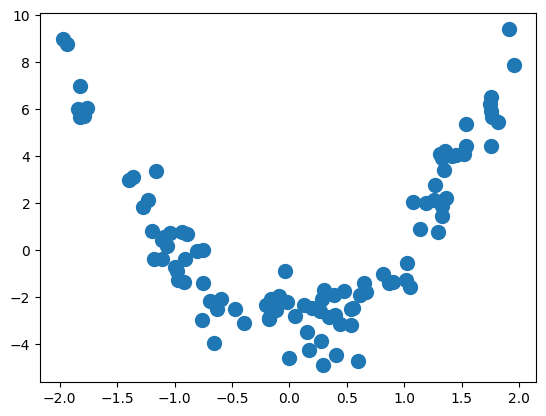

In [100]:
n = 100

a_star = 3.
b_star = -3.
noise_std = 1

x = (np.random.rand(n, 1) - 0.5) * 4
noise = np.random.normal(0, noise_std, (n, 1))
y = a_star * (x ** 2) + b_star + noise

x = torch.tensor(x, dtype=torch.float32)

xvec = x
plt.plot(x, y, 'o', markersize=10)

Nous allons construire un Pytorch modèle. Dans ce framework, on définit la fonction "forward" qui prend en argument les inputs et retourne les prédictions.

A l'aide de torch.nn.Module et de différentes layers (torch.nn.Linear, torch.nn.ReLU), terminez la classe ci-dessous pour créer un multi-layers perceptron 

In [101]:
class MLP(torch.nn.Module):
    def __init__(self, input_size):
        super().__init__()
        prev_size = input_size
            
        self.layer = torch.nn.Linear(input_size, 1)

    def forward(self, X):
        X = self.layer(X)
        
        return X

En utilisant le travail précédent, faite une cellule utilisant un torch optimizer pour optimiser le MLP 

In [102]:

class MLP(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(MLP, self).__init__()
        self.layer1 = torch.nn.Linear(input_size, hidden_size)
        self.relu = torch.nn.ReLU()
        self.layer2 = torch.nn.Linear(hidden_size, hidden_size)
        self.output_layer = torch.nn.Linear(hidden_size, 1)

    def forward(self, X):
        X = self.relu(self.layer1(X))
        X = self.relu(self.layer2(X))
        X = self.output_layer(X)
        return X


# Initialisation du modèle MLP
input_size = 1  # Notre entrée x est unidimensionnelle
hidden_size = 10  # Taille de la couche cachée
model = MLP(input_size, hidden_size)

# Fonction de perte et optimiseur
loss_fn = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Initialisation du modèle MLP
input_size = 1  # Notre entrée x est unidimensionnelle
hidden_size = 10  # Taille de la couche cachée
model = MLP(input_size, hidden_size)

# Fonction de perte et optimiseur
loss_fn = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Boucle d'entraînement
n_epochs = 1000
for epoch in range(n_epochs):
    # Prédictions du modèle
    y_pred = model(xvec)

    # Calcul de la perte
    loss = loss_fn(y_pred, torch.tensor(y, dtype=torch.float32))

    # Réinitialisation des gradients
    optimizer.zero_grad()

    # Rétropropagation
    loss.backward()

    # Mise à jour des paramètres
    optimizer.step()

    # Affichage de la perte tous les 100 époques
    if epoch % 100 == 0:
        print(f'Epoch {epoch}: loss = {loss.item()}')



Epoch 0: loss = 13.176767349243164
Epoch 100: loss = 0.9454411268234253
Epoch 200: loss = 0.9316689968109131
Epoch 300: loss = 0.9314847588539124
Epoch 400: loss = 0.9313831925392151
Epoch 500: loss = 0.9312808513641357
Epoch 600: loss = 0.93125319480896
Epoch 700: loss = 0.9312132000923157
Epoch 800: loss = 0.9311954379081726
Epoch 900: loss = 0.93121337890625


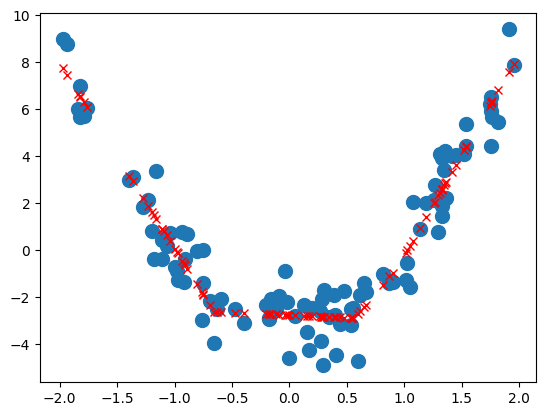

In [103]:
# Plot des predictions
#plt.plot(x, y, 'o', markersize=10)
#plt.plot(x, model(x), 'rx')

# Tracé des données originales
plt.plot(x, y, 'o', markersize=10)

# Prédictions du modèle
predictions = model(xvec).detach().numpy()

# Tracé des prédictions
plt.plot(x, predictions, 'rx')


## Construire un Recurrent Neural Network (RNN) from scratch

### Données
 
Téléchargez [ici](https://download.pytorch.org/tutorial/data.zip) un jeu de données "nom" -> pays d'origine du nom.
Les noms de chaque pays sont dans leur fichier texte "[country].txt"

A partir de ces données, créez X la liste des noms et y le pays d'origine de chaque nom

### Aide pour générer les données

A la fin de ce code, on lit les noms et leur pays d'origine.<br>
On a une fonction randomTrainingExample, qui génère le pays d'origine et le nom (en texte), puis l'ID de ce pays et le tenseur représetant le nom. <br>

A partir de là, vous pouvez générer les données X, y comme vous voulez

In [104]:
# Code pour générer le jeu de données
# En admettant que les fichiers ont été extraits dans data/raw/names/

import math
import numpy as np
from pathlib import Path
import random
import string
import time
import unicodedata

path = Path("./data/names/")
#path = Path("../data/names/")

In [105]:
def read_names(path):
    category_lines = {}
    for file in path.iterdir():
        if not file.name.endswith(".txt"):
            continue
            
        with open(file) as f:
            names = [unicodeToAscii(line.strip()) for line in f]
        
        category = file.stem
        category_lines[category] = names

    return category_lines

# Handling ASCII stuff
all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

In [106]:
category_lines = read_names(path)
all_categories = list(category_lines.keys())
n_categories = len(all_categories)

In [107]:
import torch

# Find letter index from all_letters, e.g. "a" = 0
def letterToIndex(letter):
    return all_letters.find(letter)

# Just for demonstration, turn a letter into a <1 x n_letters> Tensor
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

# Turn a line into a <line_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

In [108]:
def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line)

category = Korean / line = Si
category = Japanese / line = Daishi
category = Vietnamese / line = Pho
category = Irish / line = Quirke
category = Scottish / line = Mclean
category = Greek / line = Giannakos
category = Spanish / line = Armando
category = Czech / line = Neisser
category = Russian / line = Adulov
category = Czech / line = Ocasek


### Construire le RNN

Un Recurrent Neural Network prend, pour prédire un input X et un hidden state H.<br>
Il output une prédiction et un nouvel hidden state pour la prochaine étape.<br>
Nous allons construire un modèle:

$f(name, H_0) = (proba(\mbox{name from country 0}), proba(\mbox{name from country 1}), \dots)$

Avec $H_0$ un hidden state initial (qui sera appris).

Pour l'instant, nous allons construire un RNN linéaire.<br>
Comme pour le MLP, construisez un torch.nn.Module:
- A l'init, la classe prendra les arguments input_size, hidden_state_dim, output_size
- L'init déclare un paramètre pour l'hidden state initial $H_0$, une layer linéaire prenant (input, hidden_state) -> output_size
- Le forward fonctionnera ainsi:
    - hidden_state = $H_0$
    - For letter in name:
        - x = one-hot encode (letter)
        - output, hidden_state = linear_layer(x, hidden_state)
    - return softmax(output)


In [109]:
import torch
import torch.nn as nn
import torch.nn.functional as F
# Exemple de valeurs pour input_size et hidden_size
input_size = n_letters  # n_letters est le nombre total de lettres uniques dans votre jeu de données
hidden_size = 128  # Vous pouvez choisir cette valeur; c'est un hyperparamètre

class LinearRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size=18):
        super(LinearRNN, self).__init__()
        self.hidden_size = hidden_size
        self.h0 = nn.Parameter(torch.zeros(1, hidden_size))
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)  # Couche pour l'état caché
        self.i2o = nn.Linear(input_size + hidden_size, output_size)  # Couche pour la sortie

    def forward(self, name):
        hidden = self.h0
        for i in range(name.size()[0]):
            combined = torch.cat((name[i], hidden), 1)
            hidden = self.i2h(combined)
            output = self.i2o(combined)
        return F.log_softmax(output, dim=1)

# Exemple d'initialisation du modèle
model = LinearRNN(input_size, hidden_size)


A l'aide de la negative log likelihood (torch.nn.NLLLoss), construisez une boucle optimisant ce modèle (optimizer, itération au sein des examples).

**Attention 1:** Ici, on n'a pas des tenseurs X, y. On va prendre les exemples 1 par 1.<br>
**Attention 2:** Si le modèle apprend les examples dans l'ordre (d'abord tous les noms arabes, puis tous les chinois, puis tous les tchèques, etc), cela changera grandement le résulat (et le modèle sera très mauvais)

In [110]:
import torch.optim as optim
import random

import glob

# Chemin vers les fichiers de données

data_files = glob.glob('./data/names/*.txt')

# Dictionnaire pour stocker les noms par nationalité
names_by_nationality = {}

# Charger les données de chaque fichier
for file in data_files:
    nationality = os.path.basename(file).split('.')[0]
    with open(file, 'r', encoding='utf-8') as f:
        names = f.read().strip().split('\n')
        names_by_nationality[nationality] = [unicodeToAscii(name) for name in names]

# Afficher le nombre de noms pour quelques nationalités
{key: len(names_by_nationality[key]) for key in list(names_by_nationality.keys())[:5]}


# Création de la liste de tuples (nom, nationalité) pour l'ensemble des données d'entraînement
training_data = []
for nationality, names in names_by_nationality.items():
    training_data.extend([(name, nationality) for name in names])

# Affichage de la taille de l'ensemble des données d'entraînement et de quelques exemples
len(training_data), training_data[:5]


# Initialisation du modèle, de la perte et de l'optimiseur
model = LinearRNN(input_size, hidden_size)
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.005)
num_epochs = 10  # Vous pouvez ajuster ce nombre en fonction de vos besoins

# Préparation des données d'entraînement
# training_data soit une liste de tuples (nom, pays)
# Exemple : [('Smith', 'English'), ('Schmidt', 'German'), ...]

for epoch in range(num_epochs):
    total_loss = 0
    random.shuffle(training_data)  # Mélanger les données d'entraînement

    for name, country in training_data:
        name_tensor = lineToTensor(name)  # Convertir le nom en tenseur
        country_tensor = torch.tensor([all_categories.index(country)], dtype=torch.long)

        optimizer.zero_grad()

        output = model(name_tensor)

        loss = criterion(output, country_tensor)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    average_loss = total_loss / len(training_data)
    print(f"Epoch {epoch} - Loss: {average_loss:.4f}")


Epoch 0 - Loss: 1.3774
Epoch 1 - Loss: 1.0656
Epoch 2 - Loss: 0.9655
Epoch 3 - Loss: 0.9164
Epoch 4 - Loss: 0.8977
Epoch 5 - Loss: 0.8679
Epoch 6 - Loss: 0.8477
Epoch 7 - Loss: 0.8308
Epoch 8 - Loss: 0.8180
Epoch 9 - Loss: 0.8094


## Utilisez les RNNs de Pytorch

Sur le même jeu de données, nous allons utiliser les RNNs déjà codés par Pytorch.<br>

### Padding

Nous voulons aussi utiliser des tenseurs X et y pour utiliser data loader pour les batchs, etc


Avec du padding, créer un tenseur X de la taille (nb_data, name_max_length, vocab_size). <br>
X[i, j, :] contient le one-hot encode de la j-ème lettre du i-ème prénom. Si le i-ème prénom a moins de j lettre, alors X[i, j, :] est un vecteur nul

In [111]:
def nameToTensor(name, max_length):
    """ Convertit un nom en un tenseur one-hot avec padding """
    tensor = torch.zeros(max_length, n_letters)
    for li, letter in enumerate(name):
        tensor[li][all_letters.find(letter)] = 1
    return tensor

# Trouver la longueur maximale d'un nom
max_length = max(len(name) for names in names_by_nationality.values() for name in names)

# Création des tenseurs X et y
X = torch.zeros(len(training_data), max_length, n_letters)
y = torch.zeros(len(training_data), dtype=torch.long)

for i, (name, nationality) in enumerate(training_data):
    X[i] = nameToTensor(name, max_length)
    y[i] = all_categories.index(nationality)

# X et y sont maintenant prêts à être utilisés avec DataLoader


### Modèle

Construisez un modèle qui:
- A l'init, déclare un hidden state initial $H_0$, un RNN (avec torch.nn.RNN)
- Au forward, passe (input, $H_0$) dans le RNN, puis applique un softmax à l'output

In [112]:
n_letters = 57
input_size = n_letters  # Taille de l'entrée correspondant à la taille du vecteur one-hot
hidden_size = 128  # Taille de l'état caché, vous pouvez ajuster cette valeur
output_size = len(all_categories)  


class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNNModel, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size)
        self.out = nn.Linear(hidden_size, output_size)

    def forward(self, input):
        output, _ = self.rnn(input)
        output = self.out(output[:, -1])
        return F.log_softmax(output, dim=1)

    def initHidden(self):
        # Initialisation de l'état caché
        return torch.zeros(1, 1, self.hidden_size)


# Exemple d'initialisation du modèle
model = RNNModel(input_size, hidden_size, output_size)
print(model)


RNNModel(
  (rnn): RNN(57, 128)
  (out): Linear(in_features=128, out_features=18, bias=True)
)


In [113]:
#model(batch_X)

In [114]:
#model.rnn(batch_X)



Entraînez le modèle avec des batchs de X, y


In [115]:
from torch.utils.data import TensorDataset, DataLoader
print(len(X))
print(len(y))
# Création d'un TensorDataset et d'un DataLoader
dataset = TensorDataset(X, y)
batch_size = 64  # Vous pouvez ajuster la taille des batchs
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

optimizer = optim.SGD(model.parameters(), lr=0.005)

# Boucle d'entraînement
num_epochs =  10 # Vous pouvez ajuster le nombre d'époques
for epoch in range(num_epochs):
    total_loss = 0
    for batch in dataloader:
        batch_X, batch_y = batch
        # batch_X = batch_X.transpose(0, 1)  # Transposition pour que la dimension des séquences soit la première

        optimizer.zero_grad()
        
        """
        hidden = model.initHidden()
        hidden = hidden.repeat(1, batch_size, 1)  # Adapter la taille de l'état caché au batch

        for i in range(batch_X.size(0)):
            # output, hidden = model(batch_X[i].unsqueeze(0), hidden)
            output, hidden = model(batch_X[i], hidden)

        """
        
        output = model(batch_X)
        loss = criterion(output, batch_y)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {total_loss/len(dataloader)}')


20074
20074
Epoch 1/10, Loss: 2.237018545342099
Epoch 2/10, Loss: 1.8760821454843897
Epoch 3/10, Loss: 1.861890294749266
Epoch 4/10, Loss: 1.8571004605596992
Epoch 5/10, Loss: 1.8587800473164602
Epoch 6/10, Loss: 1.8561629850393648
Epoch 7/10, Loss: 1.8547567641659148
Epoch 8/10, Loss: 1.8548079129237278
Epoch 9/10, Loss: 1.8549109348066293
Epoch 10/10, Loss: 1.8521614685939376


### Amélioration du modèle

Tenter d'améliorer le modèle:
- En utilisant plusieurs layers dans le RNN
- En utilisant LSTM à la place de RNN (une autre forme de recurrent neural network, plus avancé)

(regardez la doc)

In [116]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim

class LSTMModel(nn.Module):
    def __init__(self, input_size, embedding_size, hidden_size, output_size, num_layers):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(input_size, embedding_size)
        self.lstm = nn.LSTM(embedding_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.embedding(x)
        h0 = torch.zeros(num_layers, x.size(0), hidden_size)
        c0 = torch.zeros(num_layers, x.size(0), hidden_size)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# Hyperparamètres
input_size = 10  # Taille du vocabulaire
embedding_size = 64  # Taille de l'embedding
hidden_size = 128  # Taille de l'état caché
output_size = 2   # Nombre de classes
num_layers = 2  # Nombre de couches LSTM

# Création du modèle
model = LSTMModel(input_size, embedding_size, hidden_size, output_size, num_layers)

# Définition de la fonction de perte et de l'optimiseur
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Exemple de données d'entrée et d'étiquettes (à remplacer par vos données)
x_train = torch.randint(0, input_size, (100, 5))  # Données d'entrée
y_train = torch.randint(0, output_size, (100,))  # Étiquettes

# Entraînement du modèle
num_epochs = 10
for epoch in range(num_epochs):
    outputs = model(x_train)
    loss = criterion(outputs, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [1/10], Loss: 0.6972
Epoch [2/10], Loss: 0.6923
Epoch [3/10], Loss: 0.6886
Epoch [4/10], Loss: 0.6855
Epoch [5/10], Loss: 0.6826
Epoch [6/10], Loss: 0.6796
Epoch [7/10], Loss: 0.6763
Epoch [8/10], Loss: 0.6722
Epoch [9/10], Loss: 0.6675
Epoch [10/10], Loss: 0.6621


### Embedding

On veut utiliser en embedding pour les lettres.
Le forward appliquerait l'embedding aux lettres, puis les layers RNN prendrait l'embedding comme input

Nous allons utiliser torch.nn.Embedding
**Attention**: Embedding ne prend pas les lettres one-hot encoded, mais leurs indices.
Par exemple, "abca", il lui faudrait le vecteur [0, 1, 2, 0]<br>
et non [[1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 0, 0]]

**Expérimenter torch.nn.Embedding**<br>
Instantier "emb" une torch.nn.Embedding avec les bons paramètres (regardez la doc)
En construisant le bon tenseur X_emb,

```emb(X_emb)```

doit retourner un tenseur (qui n'a pas de sens car il n'a rien appris pour l'instant, mais les opérations se passent bien)

In [117]:
import torch
import torch.nn as nn

class RNNWithEmbedding(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, embedding_dim, num_layers=1, model_type='RNN'):
        super(RNNWithEmbedding, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # Couche d'embedding
        self.embedding = nn.Embedding(input_size, embedding_dim)

        # RNN ou LSTM
        if model_type == 'LSTM':
            self.rnn = nn.LSTM(embedding_dim, hidden_size, num_layers, batch_first=True)
        else:
            self.rnn = nn.RNN(embedding_dim, hidden_size, num_layers, batch_first=True)

        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Appliquer l'embedding
        embedded = self.embedding(x)

        # Initialiser l'état caché
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        # Forward propagate le RNN/LSTM
        if isinstance(self.rnn, nn.LSTM):
            out, _ = self.rnn(embedded, (h0, c0))
        else:
            out, _ = self.rnn(embedded, h0)

        # Décoder la sortie du temps final
        out = self.fc(out[:, -1, :])
        return out

# Exemple d'utilisation
# input_size = Nombre total de lettres uniques dans le jeu de données
# embedding_dim = Dimension de l'embedding (par exemple, 64)
# hidden_size = Taille de l'état caché
# output_size = Nombre de classes (par exemple, nombre de langues)
input_size = n_letters  # Taille de l'entrée correspondant à la taille du vecteur one-hot
hidden_size = 128  # Taille de l'état caché, vous pouvez ajuster cette valeur
output_size = len(all_categories)  
embedding_dim = 64
model = RNNWithEmbedding(input_size, hidden_size, output_size, embedding_dim, num_layers=2, model_type='LSTM')


Construisez un modèle RNN, où les lettres passent par l'embedding avant d'être envoyées dans les couches de RNN.
Construisez une loop d'apprentissage

Expérimentez plusieurs valeurs pour le nombre de couche, la taille d'embedding ou les tailles d'hidden state.<br>
Quel neg log likelihood obtenez-vous ?

In [118]:
import torch
import torch.nn as nn
import torch.optim as optim

class RNNModel(nn.Module):
    def __init__(self, input_size, embedding_size, hidden_size, output_size, num_layers):
        super(RNNModel, self).__init__()
        self.embedding = nn.Embedding(input_size, embedding_size)
        self.rnn = nn.RNN(embedding_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.embedding(x)
        h0 = torch.zeros(num_layers, x.size(0), hidden_size)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out

input_size = 10  # Taille du vocabulaire (à ajuster)
embedding_size = 64  # Taille de l'embedding
hidden_size = 128  # Taille de l'état caché
output_size = 2   # Nombre de classes (à ajuster)
num_layers = 1  # Nombre de couches RNN

model = RNNModel(input_size, embedding_size, hidden_size, output_size, num_layers)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

x_train = torch.randint(0, input_size, (100, 5))  # Exemple de données d'entrée
y_train = torch.randint(0, output_size, (100,))  # Exemple d'étiquettes

num_epochs = 10
for epoch in range(num_epochs):
    outputs = model(x_train)
    loss = criterion(outputs, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [1/10], Loss: 0.6801
Epoch [2/10], Loss: 0.6457
Epoch [3/10], Loss: 0.6207
Epoch [4/10], Loss: 0.6018
Epoch [5/10], Loss: 0.5863
Epoch [6/10], Loss: 0.5719
Epoch [7/10], Loss: 0.5573
Epoch [8/10], Loss: 0.5417
Epoch [9/10], Loss: 0.5252
Epoch [10/10], Loss: 0.5076
